# 以主成分分析(PCA)對非監督式數據壓縮

# 特徵選擇：
    需要維護原始的特徵。
# 特徵提取：
    > "轉換"數據，"投影"(Project)數據到新的"特徵空間"
    > 以降維來說，此可保留最多相關數據的"降維壓縮"
    > 可降低"維數災難";來提高預測正確率(特別在非正規化模型)

# 主成分分析(Principal Component Analysis, PCA)
    > 為一種"非監督式學習技術"
    > 可以特徵間的"相關性"(correlation)來找出"模式"，並project到原數據相同維度或較低維度的"特徵子空間"
    > PCA 會轉換成特徵子空間，並以"變異數"大小來排序
    > 在"圖像識別"上以PCA做數據預處理往往會有較佳的結果(e.g. 每個類別都只包含很少數的樣本時)

# 1. 標準化d維"數據集"
# 2. 建立"共變異數矩陣"(covariance matrix)
# 3. 分解"共變異數陣"為"特徵向量"(evgenvector)與"特徵值"(eigenvalues)
# 4. 依照"特徵向量"相應的"特徵值"以遞減方式對進行排序
# 5. 選取k個最大的"特徵值"相對應的k個"特徵向量"，其中k是新"特徵空間"的維度(k<=d)
# 6. 用"最上面"的k個"特徵向量"，建立"投影矩陣"(project matrix) 'W'
# 7. 使用"投影矩陣" 'W'，轉換輸入是d維的"數據集"，輸出是新的k維"特徵子空間"



In [2]:
#載入數據集
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [3]:
# 1. 標準化d維"數據集"

#區分"訓練集"和"測試集"，並"標準化"到"單位變異數"
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

#Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
# 2. 建立"共變異數矩陣"(covariance matrix)

In [5]:
# 3. 分解"共變異數陣"為"特徵向量"(evgenvector)與"特徵值"(eigenvalues)
import numpy as np

# 對"標準化"後的"訓練數據集"計算"共變異數矩陣"
cov_mat = np.cov(X_train_std.T)

# 使用linalg.eig函數，來完成"特徵分解"(eigendecomposition)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
# eigen_vals
print('\nEigenvalues \n%s' % eigen_vals)
# eigen_vecs
print('\nEigenvectors \n%s' % eigen_vecs)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]

Eigenvectors 
[[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
  -2.90625226e-01  2.99096847e-01  7.90529293e-02 -3.68176414e-01
  -3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
   8.95378697e-02  6.27036396e-01 -2.74002014e-01 -1.25775752e-02
   1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
  -1.60834991e-01  3.89128239e-04  1.32328045e-01  1.77578177e-01
   3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
   5.15873402e-02 -4.05836452e-02  2.23999097e-01 -4.40592110e-01
  -2.43373853e-01 -1.30485780e-01 -4.18953

In [6]:
# 計算'解釋變異數'(explained variance)，並用matplotlib的step函數繪圖

tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')

plt.show()
# 第一個"主成分"獨佔40%的"變異數"；合併前兩個"主成分"可以解釋"數據"幾乎60%的"變異數"

<Figure size 640x480 with 1 Axes>

In [7]:
# 4. 依照"特徵向量"相應的"特徵值"以遞減方式對進行排序

# Make a list of (eigenvalues, eigenvectors) tuples
eigen_vals, eigen_vecs
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]

#Sort the (eigenvalues, eigenvectors) tuples from high to low
eigen_pairs.sort(key=lambda k:k[0], reverse=True)

In [8]:
# 5. 選取k個最大的"特徵值"相對應的k個"特徵向量"，其中k是新"特徵空間"的維度(k<=d)
# 收集'數據集'中最大的兩個，合起來可以解釋60%左右'變異數'的'特徵向量'
# 這邊只選兩個，實務上"主成分"的選取個數，必須在"計算效率"、"分類器效能"之間，折衷取得一個平衡來決定
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
             eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


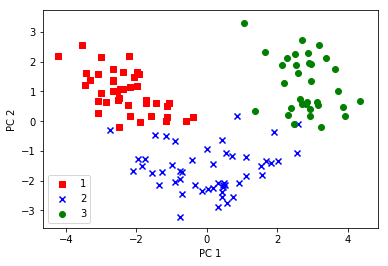

In [9]:
# 6. 用"最上面"的k個"特徵向量"，建立"投影矩陣"(project matrix) 'W'

# 轉換一個樣本
X_train_std[0].dot(w)
# 轉換整個124X13維"訓練數據集"，藉計算矩陣內積，轉換到兩個'主成分'
X_train_pca = X_train_std.dot(w)

#將轉換後的'葡萄酒訓練集'，二維散點圖表示
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
               X_train_pca[y_train==l, 1],
               c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

# Scikit-learn 中的主成分分析(PCA)

In [10]:
#以"邏輯斯迴歸"對轉換後的樣本作分類。並使用plot_decision_region函數，視覺化"決策區域圖"
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = lr.fit(X_train_pca, y_train)

C:\Users\richi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\richi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


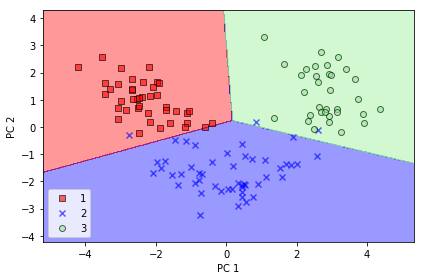

In [12]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


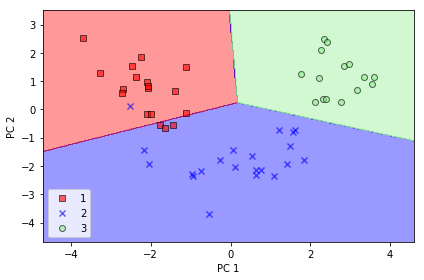

In [13]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca4.png', dpi=300)
plt.show()

In [14]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

# 以"線性判別分析"(LCA)技術來對"監督式數據"降維來最大化類別分離性

# 線性判別分析"(LCA)
    > 

# 1. "標準化"d維的數據集
# 2. 對於每個類別，計算d維的"平均值向量"(mean vector)
# 3. 建立"類別間"(between-class)的"散布矩陣"(scatter matrix)S-B與"類別內"(within-class)的"散布矩陣"S-W
# 4. 從矩陣S-W(-1)  X S-B 中計算"特徵向量"和相應的"特徵值"
# 5.
# 6. 
# 7. 

In [15]:
# 1. "標準化"d維的數據集(在PCA已經實作完成)
# 2. 對於每個類別，計算d維的"平均值向量"(mean vector)¶
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [16]:
# 3. 建立"類別間"(between-class)的"散布矩陣"(scatter matrix)S-B與"類別內"(within-class)的"散布矩陣"S-W

# 建立"類別內"(within-class)的"散布矩陣"S-W

d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [17]:
# 計算散布矩陣時，我們假設"訓練數據集"的"類別標籤"是均勻散布的，但檢查我們的類別標籤數量後,我們會發現此並不成立
print('Class label distribution: %s' 
      % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [18]:
# 因此在加總計算出"散布矩陣"S-i之前，我們必須要縮放個別的"散布矩陣"
# Hint: "共變異數矩陣"就是"常態化"的"散布矩陣"

d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [19]:
# 3. 建立"類別間"(between-class)的"散布矩陣"(scatter matrix)S-B與"類別內"(within-class)的"散布矩陣"S-W

# 建立建立"類別間"(between-class)的"散布矩陣"(scatter matrix)

mean_overall = np.mean(X_train_std, axis=0)
d = 13  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


# ============================================
# 先進核主成分分析

# 以"核主成分分析"(KPCA)做非線性降維

# "核主成分分析"(KPCA)
    > 適合處理"非線性分離的問題"
    > 使用scikit-learn巡覽集器學習分類器中的"核支援向量集"(SVM)
    > 使用前項技術將"非線性分離"的高維度數據轉換到一個新的、較低維度的子空間，使其"可線性分離"
    
# 核技巧
    > 可計算兩個由原始的"特徵空間"所產生的高維"特徵向量"之間的"相似度"
    
# 常用的"核心"
    > "多項式核"(polynominal kernal)
    > "雙曲正切核"(Hyperbolic tangent kernal，sigmoid)
    > "徑向基函數核"(Radial Basis Function Kernal，RBF)；高斯核(Gaussian Kernal)

In [8]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from numpy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.linalg.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)

    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i]
                            for i in range(1, n_components + 1)))

    return X_pc

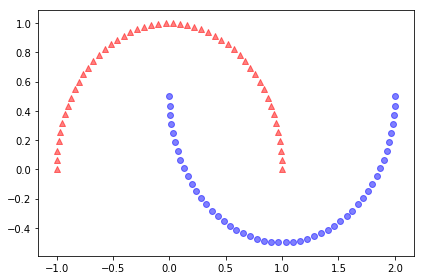

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
plt.savefig('./figures/half_moon_1.png', dpi=300)
plt.show()

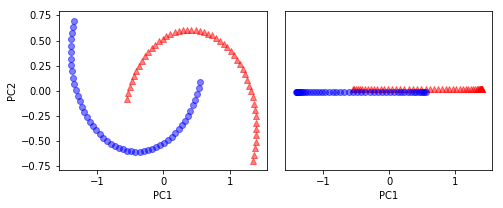

In [5]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('./figures/half_moon_2.png', dpi=300)
plt.show()

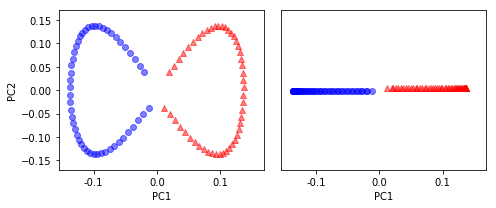

In [9]:
from matplotlib.ticker import FormatStrFormatter

X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

plt.tight_layout()
# plt.savefig('./figures/half_moon_3.png', dpi=300)
plt.show()

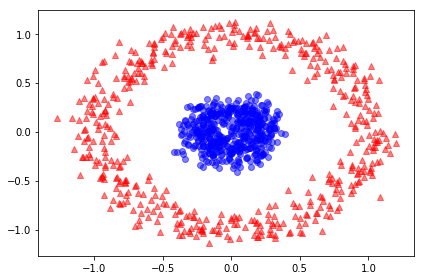

In [10]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('./figures/circles_1.png', dpi=300)
plt.show()

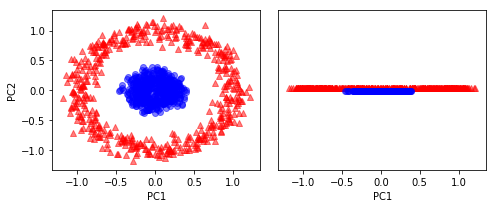

In [11]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('./figures/circles_2.png', dpi=300)
plt.show()

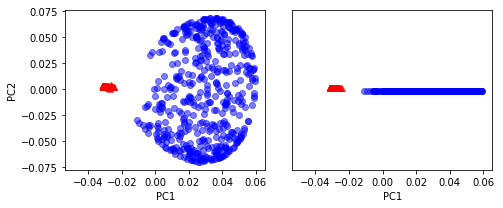

In [12]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('./figures/circles_3.png', dpi=300)
plt.show()